PRADNYA TOPALE

BE COMPS

2018130057

# Tutorial 2: Feature Engineering: Dimensional Reduction

# Q.1: What is ‘Curse of Dimensionality’? Explain

Ans. Curse of dimensionality describes the explosive nature of increasing data dimensions and its resulting exponential increase in computational efforts required for its processing and/or analysis. In other words, it is the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset.
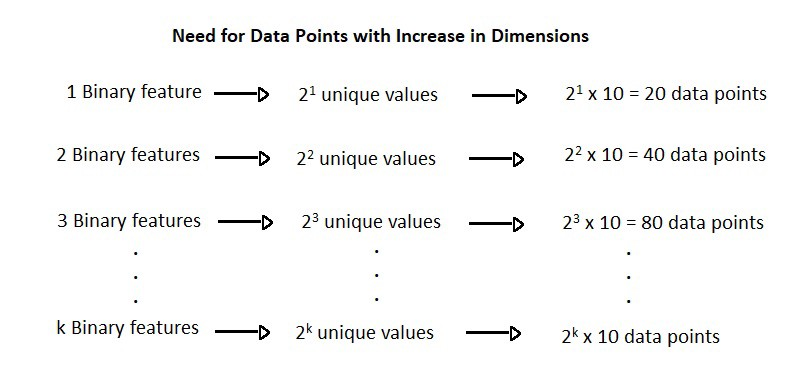
- As the dimensionality increases, the number of data points required for good performance of any machine learning algorithm increases exponentially. 
- The reason is that, we would need more number of data points for any given combination of features, for any machine learning model to be valid. 
- For example, let’s say that for a model to perform well, we need at least 10 data points for each combination of feature values. If we assume that we have one binary feature, then for its 21 unique values (0 and 1) we would need 2¹x 10 = 20 data points. For 2 binary features, we would have 2² unique values and need 2² x 10 = 40 data points. Thus, for k-number of binary features we would need 2ᵏ x 10 data points.

How To Combat The CoD
1. Dimensionality Reduction -
Dimensionality reduction is a method of converting the high dimensional variables into lower dimensional variables without changing the specific information of the variables. To overcome the issue of the curse of dimensionality, Dimensionality Reduction is used to reduce the feature space with consideration by a set of principal features. Dimensionality Reduction contains no extra variables that make the data analyzing easier and simple for machine learning algorithms and resulting in a faster outcome from the algorithms.
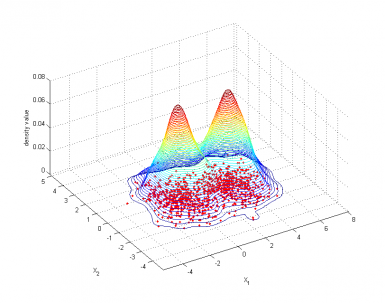

2. Regularisation -
The problem of curse of dimensionality comes from that parameter estimates which are unstable, hence, regularising these estimates will help that the parameters to make correct estimation.

3. PCA -
Principal Component Analysis (PCA) is one of the most traditional tools used for dimension reduction. It transforms the data into the most informative space, thereby allowing the use of lesser dimensions which are almost as informative as the original data. But since it is a linear tool, nonlinear relations between the components of the initial data may be lost in the preprocessing.

# Q.2: What is feature selection? Why is it needed? What are the different approaches of feature selection?

Ans. In statistics and Machine learning, feature selection (also known as variable selection, attribute selection, or variable subset selection) is the practice of choosing a subset of relevant features (predictors and variables) for use in a model construction. It is the automatic selection of attributes present in the data (such as columns in tabular data) that are most significant and appropriate to the predictive modeling problem that one is working on.

Its need -
1. It enables the machine learning algorithm to train faster.
2. It reduces the complexity of a model and makes it easier to interpret.
3. It improves the accuracy of a model if the right subset is chosen.
4. It reduces overfitting hence generalization is enhanced.
5. It helps in avoiding the curse of dimensionality.


Different Approaches -
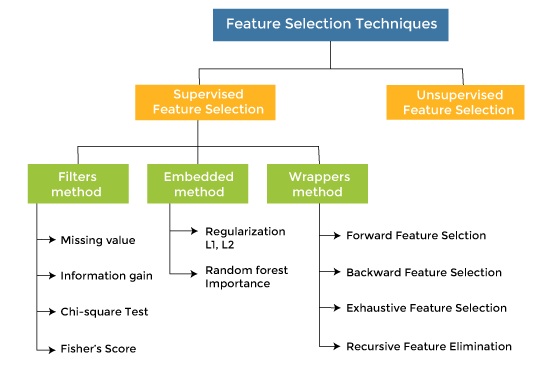

There are mainly two types of Feature Selection techniques, which are:

Supervised Feature Selection technique:Considers the target variable and can be used for the labelled dataset.
Unsupervised Feature Selection technique: Ignores the target variable and can be used for the unlabelled dataset.

1. Wrapper Methods
In wrapper methodology, selection of features is done by considering it as a search problem, in which different combinations are made, evaluated, and compared with other combinations. It trains the algorithm by using the subset of features iteratively.
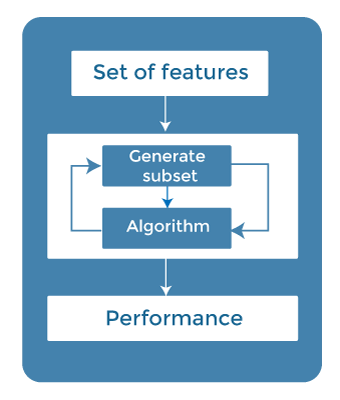
On the basis of the output of the model, features are added or subtracted, and with this feature set, the model has trained again.
Some techniques of wrapper methods are:
- Forward selection - Forward selection is an iterative process, which begins with an empty set of features. After each iteration, it keeps adding on a feature and evaluates the performance to check whether it is improving the performance or not. The process continues until the addition of a new variable/feature does not improve the performance of the model.
- Backward elimination - Backward elimination is also an iterative approach, but it is the opposite of forward selection. This technique begins the process by considering all the features and removes the least significant feature. This elimination process continues until removing the features does not improve the performance of the model.
- Exhaustive Feature Selection - Exhaustive feature selection is one of the best feature selection methods, which evaluates each feature set as brute-force. It means this method tries & make each possible combination of features and return the best performing feature set.
- Recursive Feature Elimination - Recursive feature elimination is a recursive greedy optimization approach, where features are selected by recursively taking a smaller and smaller subset of features. Now, an estimator is trained with each set of features, and the importance of each feature is determined using coef_attribute or through a feature_importances_attribute.

2. Filter Methods
In Filter Method, features are selected on the basis of statistics measures. This method does not depend on the learning algorithm and chooses the features as a pre-processing step.
The filter method filters out the irrelevant feature and redundant columns from the model by using different metrics through ranking.
The advantage of using filter methods is that it needs low computational time and does not overfit the data.
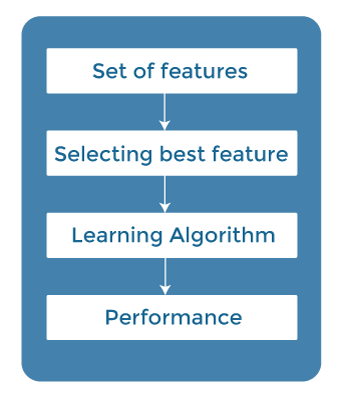
Some common techniques of Filter methods are as follows:
- Information Gain: Information gain determines the reduction in entropy while transforming the dataset. It can be used as a feature selection technique by calculating the information gain of each variable with respect to the target variable.
- Chi-square Test: Chi-square test is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.
- Fisher's Score: Fisher's score is one of the popular supervised technique of features selection. It returns the rank of the variable on the fisher's criteria in descending order. Then we can select the variables with a large fisher's score.
- Missing Value Ratio: The value of the missing value ratio can be used for evaluating the feature set against the threshold value. The formula for obtaining the missing value ratio is the number of missing values in each column divided by the total number of observations. The variable is having more than the threshold value can be dropped.
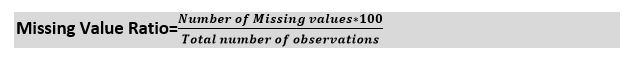

3. Embedded Methods
Embedded methods combined the advantages of both filter and wrapper methods by considering the interaction of features along with low computational cost. These are fast processing methods similar to the filter method but more accurate than the filter method.
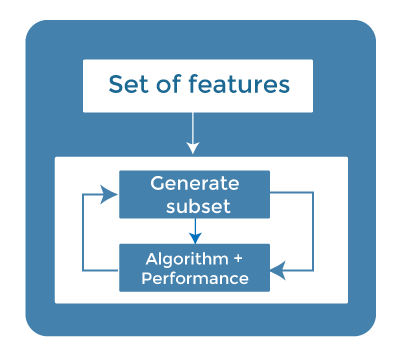
These methods are also iterative, which evaluates each iteration, and optimally finds the most important features that contribute the most to training in a particular iteration. Some techniques of embedded methods are:

- Regularization: Regularization adds a penalty term to different parameters of the machine learning model for avoiding overfitting in the model. This penalty term is added to the coefficients; hence it shrinks some coefficients to zero. Those features with zero coefficients can be removed from the dataset. The types of regularization techniques are L1 Regularization (Lasso Regularization) or Elastic Nets (L1 and L2 regularization).
- Random Forest Importance: Different tree-based methods of feature selection help us with feature importance to provide a way of selecting features. Here, feature importance specifies which feature has more importance in model building or has a great impact on the target variable. Random Forest is such a tree-based method, which is a type of bagging algorithm that aggregates a different number of decision trees. It automatically ranks the nodes by their performance or decrease in the impurity (Gini impurity) over all the trees. Nodes are arranged as per the impurity values, and thus it allows to pruning of trees below a specific node. The remaining nodes create a subset of the most important features.

In [3]:
# evaluate a lda model on the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from itertools import cycle

In [4]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [5]:
# define model
model = LinearDiscriminantAnalysis()

In [6]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [7]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [9]:
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.893 (0.033)


In [10]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [12]:
y_pred = model.predict(X_test)

In [13]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 91.0 %


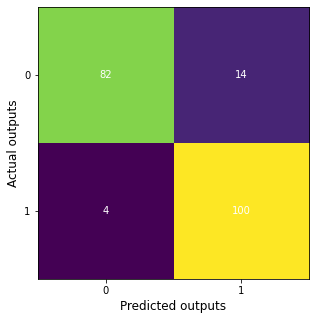

In [14]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        96
           1       0.88      0.96      0.92       104

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



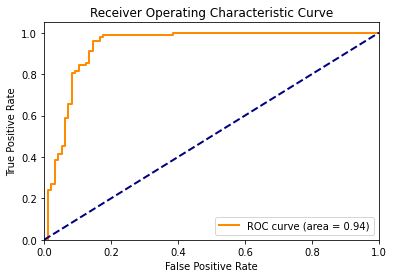

In [16]:
#ROC and AUC 
y_prob = model.predict_proba(X_test)
y_prob = y_prob[:, 1]
n_classes = len(model.classes_)
fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [17]:
#Tuning the model
# define model
LDA = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
LDAparam_grid = {
    'shrinkage' : np.arange(0, 1, 0.01),
    'solver': ['lsqr', 'eigen']
}

In [18]:
LDA_search = GridSearchCV(LDA, param_grid=LDAparam_grid, verbose = 3, scoring='accuracy', cv=cv)
# fitting the model for grid search 
LDA_search.fit(X , y)

Fitting 30 folds for each of 200 candidates, totalling 6000 fits
[CV 1/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 2/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 3/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 4/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 5/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 6/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 7/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 8/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 9/30] END ....................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 10/30] END ...................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 11/30] END ...................shrinkage=0.0, solver=lsqr; total time=   0.0s
[CV 12/30] END ...................shrinkage=

[CV 18/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV 30/30] END .............

[CV 20/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.03, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.04, solver=lsqr; total time=   0.0s
[CV 2/30] END ..............

[CV 22/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.06, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.06, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.06, solver=lsqr; total time=   0.0s
[CV 4/30] END ..............

[CV 21/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.07, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.08, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.08, solver=lsqr; total time=   0.0s
[CV 3/30] END ..............

[CV 27/30] END ...................shrinkage=0.1, solver=lsqr; total time=   0.0s
[CV 28/30] END ...................shrinkage=0.1, solver=lsqr; total time=   0.0s
[CV 29/30] END ...................shrinkage=0.1, solver=lsqr; total time=   0.0s
[CV 30/30] END ...................shrinkage=0.1, solver=lsqr; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV 9/30] END ..............

[CV 26/30] END ..................shrinkage=0.12, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.12, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.12, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.12, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.12, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 5/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.12, solver=eigen; total time=   0.0s
[CV 8/30] END ..............

[CV 25/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.14, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 5/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.14, solver=eigen; total time=   0.0s
[CV 7/30] END ..............

[CV 25/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.16, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.17, solver=lsqr; total time=   0.0s
[CV 7/30] END ..............

[CV 10/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 18/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.18, solver=eigen; total time=   0.0s
[CV 22/30] END .............

[CV 29/30] END ...................shrinkage=0.2, solver=lsqr; total time=   0.0s
[CV 30/30] END ...................shrinkage=0.2, solver=lsqr; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.2, solver=eigen; total time=   0.0s
[CV 11/30] END .............

[CV 5/30] END ..................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 10/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.22, solver=eigen; total time=   0.0s
[CV 17/30] END .............

[CV 10/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 18/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.24, solver=eigen; total time=   0.0s
[CV 22/30] END .............

[CV 17/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 18/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.26, solver=eigen; total time=   0.0s
[CV 29/30] END .............

[CV 3/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 13/30] END ..................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 14/30] END ..................shrinkage=0.29, solver=lsqr; total time=   0.0s
[CV 15/30] END .............

[CV 19/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 21/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.3, solver=eigen; total time=   0.0s
[CV 1/30] END ..............

[CV 9/30] END ...................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 13/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 14/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 15/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 16/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 17/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 19/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.33, solver=lsqr; total time=   0.0s
[CV 21/30] END .............

[CV 21/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 22/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 23/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 24/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 25/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 26/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 27/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 28/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 29/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 30/30] END ...shrinkage=0.35000000000000003, solver=lsqr; total time=   0.0s
[CV 1/30] END ...shrinkage=0.35000000000000003, solver=eigen; total time=   0.0s
[CV 2/30] END ...shrinkage=0.35000000000000003, solver=eigen; total time=   0.0s
[CV 3/30] END ...shrinkage=0

[CV 11/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 13/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 14/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 15/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 16/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 17/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 19/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 21/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.37, solver=lsqr; total time=   0.0s
[CV 23/30] END .............

[CV 5/30] END ..................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 10/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.39, solver=eigen; total time=   0.0s
[CV 17/30] END .............

[CV 26/30] END ..shrinkage=0.41000000000000003, solver=eigen; total time=   0.0s
[CV 27/30] END ..shrinkage=0.41000000000000003, solver=eigen; total time=   0.0s
[CV 28/30] END ..shrinkage=0.41000000000000003, solver=eigen; total time=   0.0s
[CV 29/30] END ..shrinkage=0.41000000000000003, solver=eigen; total time=   0.0s
[CV 30/30] END ..shrinkage=0.41000000000000003, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.42, solver=lsqr; total time=   0.0s
[CV 8/30] END ..............

[CV 14/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 18/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.43, solver=eigen; total time=   0.0s
[CV 26/30] END .............

[CV 6/30] END ..................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 10/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.45, solver=eigen; total time=   0.0s
[CV 18/30] END .............

[CV 30/30] END ...shrinkage=0.47000000000000003, solver=lsqr; total time=   0.0s
[CV 1/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 2/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 3/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 4/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 5/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 6/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 7/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 8/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 9/30] END ...shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 10/30] END ..shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 11/30] END ..shrinkage=0.47000000000000003, solver=eigen; total time=   0.0s
[CV 12/30] END ..shrinkage=0

[CV 27/30] END ..................shrinkage=0.49, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.49, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.49, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.49, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 5/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.49, solver=eigen; total time=   0.0s
[CV 9/30] END ..............

[CV 1/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 5/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 10/30] END .................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.51, solver=eigen; total time=   0.0s
[CV 13/30] END .............

[CV 28/30] END ..................shrinkage=0.53, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.53, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.53, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 5/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 6/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.53, solver=eigen; total time=   0.0s
[CV 10/30] END .............

[CV 17/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 19/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 21/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.55, solver=lsqr; total time=   0.0s
[CV 29/30] END .............

[CV 29/30] END ...shrinkage=0.5700000000000001, solver=eigen; total time=   0.0s
[CV 30/30] END ...shrinkage=0.5700000000000001, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.58, solver=lsqr; total time=   0.0s
[CV 11/30] END .............

[CV 16/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 18/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 19/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 20/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 21/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 22/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 23/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.59, solver=eigen; total time=   0.0s
[CV 28/30] END .............

[CV 6/30] END ..................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 7/30] END ..................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 8/30] END ..................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 9/30] END ..................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 10/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 11/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 12/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 13/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 14/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 15/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 16/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 17/30] END .................shrinkage=0.61, solver=eigen; total time=   0.0s
[CV 18/30] END .............

[CV 21/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.63, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.63, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.63, solver=eigen; total time=   0.0s
[CV 3/30] END ..............

[CV 21/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.65, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.65, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.65, solver=eigen; total time=   0.0s
[CV 3/30] END ..............

[CV 1/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.68, solver=lsqr; total time=   0.0s
[CV 13/30] END .............

[CV 19/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 20/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 21/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 22/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 23/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 24/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 25/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 26/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 27/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 28/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 29/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 30/30] END ...shrinkage=0.6900000000000001, solver=eigen; total time=   0.0s
[CV 1/30] END .....shrinkage

[CV 24/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.71, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.72, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.72, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.72, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.72, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.72, solver=lsqr; total time=   0.0s
[CV 6/30] END ..............

[CV 30/30] END .................shrinkage=0.73, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.74, solver=lsqr; total time=   0.0s
[CV 12/30] END .............

[CV 8/30] END ...................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 13/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 14/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 15/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 16/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 17/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 19/30] END ..................shrinkage=0.76, solver=lsqr; total time=   0.0s
[CV 20/30] END .............

[CV 19/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 21/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.78, solver=lsqr; total time=   0.0s
[CV 1/30] END ..............

[CV 30/30] END .................shrinkage=0.79, solver=eigen; total time=   0.0s
[CV 1/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 2/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 3/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 4/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 5/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 6/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 7/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 8/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 9/30] END ....................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 10/30] END ...................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 11/30] END ...................shrinkage=0.8, solver=lsqr; total time=   0.0s
[CV 12/30] END .............

[CV 11/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 12/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 13/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 14/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 15/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 16/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 17/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 18/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 19/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 20/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 21/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 22/30] END ....shrinkage=0.8200000000000001, solver=lsqr; total time=   0.0s
[CV 23/30] END ....shrinkage

[CV 30/30] END ...shrinkage=0.8300000000000001, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 6/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 7/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.84, solver=lsqr; total time=   0.0s
[CV 12/30] END .............

[CV 7/30] END ...................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 8/30] END ...................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 9/30] END ...................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 10/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 11/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 12/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 13/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 14/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 15/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 16/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 17/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.86, solver=lsqr; total time=   0.0s
[CV 19/30] END .............

[CV 14/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 15/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 16/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 17/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 18/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 19/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 20/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 21/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 22/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 23/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.88, solver=lsqr; total time=   0.0s
[CV 26/30] END .............

[CV 24/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.9, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.91, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.91, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.91, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.91, solver=lsqr; total time=   0.0s
[CV 5/30] END ...................shrinkage=0.91, solver=lsqr; total time=   0.0s
[CV 6/30] END ..............

[CV 23/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 24/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 25/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 26/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 27/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 28/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 29/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 30/30] END ..................shrinkage=0.93, solver=lsqr; total time=   0.0s
[CV 1/30] END ..................shrinkage=0.93, solver=eigen; total time=   0.0s
[CV 2/30] END ..................shrinkage=0.93, solver=eigen; total time=   0.0s
[CV 3/30] END ..................shrinkage=0.93, solver=eigen; total time=   0.0s
[CV 4/30] END ..................shrinkage=0.93, solver=eigen; total time=   0.0s
[CV 5/30] END ..............

[CV 27/30] END ....shrinkage=0.9500000000000001, solver=lsqr; total time=   0.0s
[CV 28/30] END ....shrinkage=0.9500000000000001, solver=lsqr; total time=   0.0s
[CV 29/30] END ....shrinkage=0.9500000000000001, solver=lsqr; total time=   0.0s
[CV 30/30] END ....shrinkage=0.9500000000000001, solver=lsqr; total time=   0.0s
[CV 1/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 2/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 3/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 4/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 5/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 6/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 7/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 8/30] END ....shrinkage=0.9500000000000001, solver=eigen; total time=   0.0s
[CV 9/30] END ....shrinkage=

[CV 23/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 24/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.97, solver=eigen; total time=   0.0s
[CV 1/30] END ...................shrinkage=0.98, solver=lsqr; total time=   0.0s
[CV 2/30] END ...................shrinkage=0.98, solver=lsqr; total time=   0.0s
[CV 3/30] END ...................shrinkage=0.98, solver=lsqr; total time=   0.0s
[CV 4/30] END ...................shrinkage=0.98, solver=lsqr; total time=   0.0s
[CV 5/30] END ..............

[CV 24/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 25/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 26/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 27/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 28/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 29/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s
[CV 30/30] END .................shrinkage=0.99, solver=eigen; total time=   0.0s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy', verbose=3)

In [19]:
# summarize
print('Mean Accuracy: %.3f' % LDA_search.best_score_)
print('Best Parameters: %s' % LDA_search.best_params_)

Mean Accuracy: 0.894
Best Parameters: {'shrinkage': 0.02, 'solver': 'lsqr'}


In [20]:
LDA_tuned = LinearDiscriminantAnalysis(**LDA_search.best_params_)
LDA_tuned.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0.02, solver='lsqr')

In [21]:
y_pred = LDA_tuned.predict(X_test)

In [22]:
print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred) * 100,3)} %" )

Test Accuracy: 90.5 %


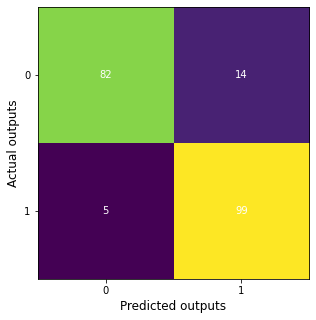

In [23]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90        96
           1       0.88      0.95      0.91       104

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



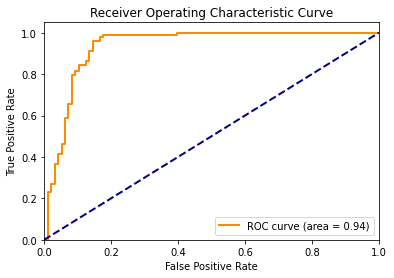

In [25]:
y_prob = LDA_tuned.predict_proba(X_test)
y_prob = y_prob[:, 1]
n_classes = len(LDA_tuned.classes_)
fpr, tpr,_ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()